In [1]:
import numpy as np
import matplotlib.pyplot as plt
from svmutil import *
%matplotlib inline

In [2]:
url_Train = "http://www.amlbook.com/data/zip/features.train"
train = np.genfromtxt(url_Train)

url_Test = "http://www.amlbook.com/data/zip/features.test"
test = np.genfromtxt(url_Test)

In [5]:
def one_vs_all(data, number):
    X = data[:, 1:]
    y = data[:, 0]
    modified_y = np.where(y==number, 1, -1)
    return (X.tolist(), list(modified_y))
    

In [6]:
N = 10
E_ins_and_num_support_vecs = [None] * N

for i in range(N):
    X, y = one_vs_all(train, i)
    
    prob = svm_problem(y, X)
    param = svm_parameter('-t 1 -c 0.01 -d 2 -g 1 -r 1')
    m = svm_train(prob, param)
    
    p_label, p_acc, p_val = svm_predict(y, X, m)
    
    E_in = 100-p_acc[0]
    num_support_vectors = len(m.get_SV())
    E_ins_and_num_support_vecs[i] = (E_in, i, num_support_vectors)
    
E_ins_and_num_support_vecs.sort()    

Accuracy = 89.4116% (6519/7291) (classification)
Accuracy = 98.5599% (7186/7291) (classification)


/Users/Mike/Documents/Python/MachineLearning/Learning From Data/EDX/Homework/Problems/svmutil.py:81: RuntimeWarning: invalid value encountered in double_scalars
  SCC = ((l*sumvy-sumv*sumy)*(l*sumvy-sumv*sumy))/((l*sumvv-sumv*sumv)*(l*sumyy-sumy*sumy))


Accuracy = 89.9739% (6560/7291) (classification)
Accuracy = 90.9752% (6633/7291) (classification)
Accuracy = 91.0575% (6639/7291) (classification)
Accuracy = 92.3742% (6735/7291) (classification)
Accuracy = 90.8929% (6627/7291) (classification)
Accuracy = 91.1535% (6646/7291) (classification)
Accuracy = 92.5662% (6749/7291) (classification)
Accuracy = 91.1672% (6647/7291) (classification)


In [7]:
print("With C = 0.01 and Q = 2, the following classifiers\
 that has the highest Ein is {}".format(E_ins_and_num_support_vecs[-1][1]))

With C = 0.01 and Q = 2, the following classifiers that has the highest Ein is 0


In [8]:
print("With C = 0.01 and Q = 2, the following classifiers\
 that has the lowest Ein is {}".format(E_ins_and_num_support_vecs[0][1]))

With C = 0.01 and Q = 2, the following classifiers that has the lowest Ein is 1


In [9]:
difference = E_ins_and_num_support_vecs[-1][2] - E_ins_and_num_support_vecs[0][2]

print("The following values is the closest to the difference\
between the number of support vectors of these two classifiers is {}".format(difference))

The following values is the closest to the differencebetween the number of support vectors of these two classifiers is 1794


In [21]:
idx_for_1_train = np.argwhere(train[:, 0] == 1)
idx_for_1_test = np.argwhere(test[:, 0] == 1)

idx_for_5_train = np.argwhere(train[:, 0] == 5)
idx_for_5_test = np.argwhere(test[:, 0] == 5)

y_1_5_train = train[np.append(idx_for_1_train, idx_for_5_train), 0].astype('float64')
X_1_5_train = train[np.append(idx_for_1_train, idx_for_5_train), 1:].astype('float64')

y_train = list(np.where(y_1_5_train == 1, 1.0, -1.0).astype('float64'))
X_train = X_1_5_train.tolist()

y_1_5_test = test[np.append(idx_for_1_test, idx_for_5_test), 0].astype('float64')
X_1_5_test = test[np.append(idx_for_1_test, idx_for_5_test), 1:].astype('float64')

y_test = list(np.where(y_1_5_test == 1, 1.0, -1.0).astype('float64'))
X_test = X_1_5_test.tolist()

In [23]:
Cs = np.array([1e-3, 1e-2, 1e-1, 1e-0])
E_ins = np.zeros(len(Cs))
E_outs = np.zeros(len(Cs))
num_support_vectors = np.zeros(len(Cs))

for i, C in enumerate(Cs):  
    
    prob = svm_problem(y_train, X_train)
    param = svm_parameter('-t 1 -c {} -d 2 -g 1 -r 1'.format(C))
    m = svm_train(prob, param)
    
    p_label, p_acc_in,  p_val = svm_predict(y_train, X_train, m)
    p_label, p_acc_out, p_val = svm_predict(y_test, X_test, m)
    
    E_in  = 100-p_acc_in[0]
    E_out = 100-p_acc_out[0]
    
    E_ins[i]  = E_in
    E_outs[i] = E_out
    num_support_vectors[i] = len(m.get_sv_indices())

Accuracy = 99.5516% (1554/1561) (classification)
Accuracy = 98.3491% (417/424) (classification)
Accuracy = 99.5516% (1554/1561) (classification)
Accuracy = 98.1132% (416/424) (classification)
Accuracy = 99.5516% (1554/1561) (classification)
Accuracy = 98.1132% (416/424) (classification)
Accuracy = 99.6797% (1556/1561) (classification)
Accuracy = 98.1132% (416/424) (classification)


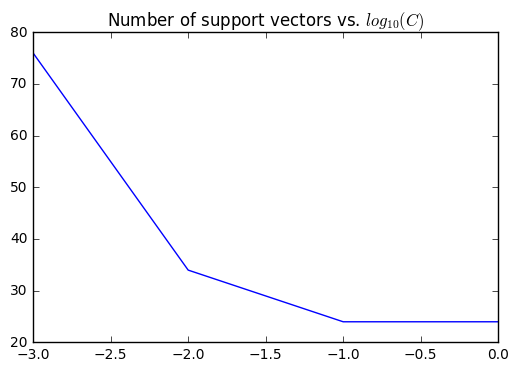

In [24]:
plt.title("Number of support vectors vs. $log_{10}(C)$")
plt.plot(np.log10(Cs), num_support_vectors)

In [25]:
num_support_vectors

array([ 76.,  34.,  24.,  24.])

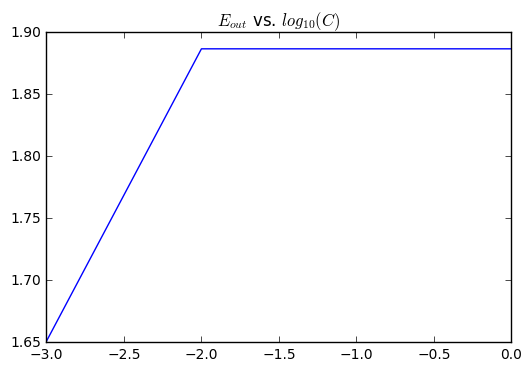

In [26]:
plt.title("$E_{out}$ vs. $log_{10}(C)$")
plt.plot(np.log10(Cs), E_outs)

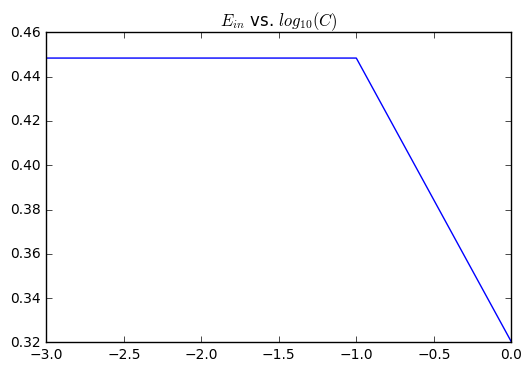

In [28]:
plt.title("$E_{in}$ vs. $log_{10}(C)$")
plt.plot(np.log10(Cs), E_ins)

In [31]:
Qs = np.array([2, 5])
Cs = np.array([1e-3, 1e-2, 1e-1, 1e-0])
E_ins  = np.zeros((len(Qs),len(Cs)))
E_outs = np.zeros((len(Qs),len(Cs)))
num_support_vectors = np.zeros((len(Qs),len(Cs)))

for j, Q in enumerate(Qs):
    for i, C in enumerate(Cs):  

        prob = svm_problem(y_train, X_train)
        param = svm_parameter('-q -t 1 -c {} -d {} -g 1 -r 1'.format(C, Q))
        m = svm_train(prob, param)

        p_label, p_acc_in,  p_val = svm_predict(y_train, X_train, m)
        p_label, p_acc_out, p_val = svm_predict(y_test, X_test, m)

        E_in  = 100-p_acc_in[0]
        E_out = 100-p_acc_out[0]

        E_ins[j, i]  = E_in
        E_outs[j, i] = E_out
        num_support_vectors[j, i] = len(m.get_sv_indices())

Accuracy = 99.5516% (1554/1561) (classification)
Accuracy = 98.3491% (417/424) (classification)
Accuracy = 99.5516% (1554/1561) (classification)
Accuracy = 98.1132% (416/424) (classification)
Accuracy = 99.5516% (1554/1561) (classification)
Accuracy = 98.1132% (416/424) (classification)
Accuracy = 99.6797% (1556/1561) (classification)
Accuracy = 98.1132% (416/424) (classification)
Accuracy = 99.5516% (1554/1561) (classification)
Accuracy = 97.8774% (415/424) (classification)
Accuracy = 99.6156% (1555/1561) (classification)
Accuracy = 97.8774% (415/424) (classification)
Accuracy = 99.6797% (1556/1561) (classification)
Accuracy = 98.1132% (416/424) (classification)
Accuracy = 99.6797% (1556/1561) (classification)
Accuracy = 97.8774% (415/424) (classification)


In [32]:
print("E_in at C = 0.001 and Q = 5 is greater than Q = 2 is {}".format(E_ins[0,0] < E_ins[1,0]))
print("The number of support vectors at C = 0.001\
and Q = 5 is lower than Q = 2 is {}".format(num_support_vectors[0,0] > num_support_vectors[1,0]))
print("E_in at C = 0.01 and Q = 5 is greater than Q = 2 is {}".format(E_ins[0,2] < E_ins[1,2]))
print("E_out at C = 1 and Q = 5 is lower than Q = 2 is {}".format(E_outs[0,-1] > E_outs[1,-1]))

E_in at C = 0.001 and Q = 5 is greater than Q = 2 is False
The number of support vectors at C = 0.001and Q = 5 is lower than Q = 2 is True
E_in at C = 0.01 and Q = 5 is greater than Q = 2 is False
E_out at C = 1 and Q = 5 is lower than Q = 2 is False


In [33]:
from sklearn.cross_validation import train_test_split

In [34]:
trials = 100
Q = 2
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1e-0]
best_cs = np.zeros(trials)

for i in range(trials):
    E_vals = np.zeros(len(Cs))
    for j, C in enumerate(Cs):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size = 0.1)
        prob = svm_problem(ytrain, Xtrain)
        param = svm_parameter('-t 1 -c {} -d {} -g 1 -r 1'.format(C, Q))
        m = svm_train(prob, param)
        
        p_acc = svm_predict(ytest, Xtest, m)[1][0]
        E_vals[j] = 100 - p_acc
    best_cs[i] = np.argmin(E_vals)

Accuracy = 98.0892% (154/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 96.8153% (152/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 98.0892% (154/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 98.7261% (155/157) (classifica

In [35]:
print("Best C = {} is selected most often at Q = 2". format(Cs[np.argmax(np.bincount(best_cs.astype(int)))]))

Best C = 0.001 is selected most often at Q = 2


In [36]:
trials = 100
Q = 2
C = 1e-3
E_vals = np.zeros(trials)

for i in range(trials):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size = 0.1)
    prob = svm_problem(ytrain, Xtrain)
    param = svm_parameter('-t 1 -c {} -d {} -g 1 -r 1'.format(C, Q))
    m = svm_train(prob, param)

    p_acc = svm_predict(ytest, Xtest, m)[1][0]
    E_vals[i] = 100 - p_acc

avg_E_val = np.mean(E_vals)

Accuracy = 100% (157/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 98.7261% (155/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 98.7261% (155/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 98.7261% (155/157) (classification)
Accuracy = 100% (157/157) (classification)
Accuracy = 98.7261% (155/157) (classification)
Accuracy = 99.3631% (156/157) (classification)
Accuracy = 98.0892% (154/157) (classification)
Accuracy =

In [37]:
print("The average value of Ecv over the 100 runs is {}".format(round(avg_E_val/100, 3)))

The average value of Ecv over the 100 runs is 0.005


In [38]:
Cs = np.array([0.01, 1, 100, 10000, 1000000])
E_ins = np.zeros(len(Cs))
E_outs = np.zeros(len(Cs))

for i, C in enumerate(Cs):  
    
    prob = svm_problem(y_train, X_train)
    param = svm_parameter('-g 1 -c {}'.format(C))
    m = svm_train(prob, param)
    
    p_label, p_acc_in,  p_val = svm_predict(y_train, X_train, m)
    p_label, p_acc_out, p_val = svm_predict(y_test, X_test, m)
    print("Expected E_out for C = {} is {}".format(C, len(m.get_sv_indices())/(len(y_train) - 1)))
    
    E_in  = 100-p_acc_in[0]
    E_out = 100-p_acc_out[0]
    
    E_ins[i]  = E_in
    E_outs[i] = E_out

Accuracy = 99.6156% (1555/1561) (classification)
Accuracy = 97.6415% (414/424) (classification)
Expected E_out for C = 0.01 is 0.25833333333333336
Accuracy = 99.5516% (1554/1561) (classification)
Accuracy = 97.8774% (415/424) (classification)
Expected E_out for C = 1.0 is 0.01987179487179487
Accuracy = 99.6797% (1556/1561) (classification)
Accuracy = 98.1132% (416/424) (classification)
Expected E_out for C = 100.0 is 0.014102564102564103
Accuracy = 99.7438% (1557/1561) (classification)
Accuracy = 97.6415% (414/424) (classification)
Expected E_out for C = 10000.0 is 0.01282051282051282
Accuracy = 99.9359% (1560/1561) (classification)
Accuracy = 97.6415% (414/424) (classification)
Expected E_out for C = 1000000.0 is 0.010897435897435897


In [41]:
print("The value of C with the lowest E_in is {}".format(Cs[np.argmin(E_ins)]))

The value of C with the lowest E_in is 1000000.0


In [42]:
print("The value of C with the lowest E_out is {}".format(Cs[np.argmin(E_outs)]))

The value of C with the lowest E_out is 100.0
